# Initial CNN Model Attempt

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Normalization
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [2]:
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, InputLayer
from keras.utils.np_utils import to_categorical

### Part 1 Figuuring out how to deal with NaNs
Come to the coclusion just to use test data set for now.

In [3]:
Ford = pd.read_csv("Ford_Cleaned_Date.csv")
Ford.date = pd.to_datetime(Ford.date)
Ford = Ford.set_index("date")

In [4]:
Ford = Ford.iloc[14:, :]
Ford.shape

(801, 169)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
pd.DataFrame(Ford.isna().sum()).T
# we see that the gain, average gain, average loss and loss columns are causing large numbers of NA's
# will need to come back and solve this issue.

,Ford,F-150,Ford Bronco_x,Ford Mustang_x,Ford Stock,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ford Motor Company,Ford Mustang_y,Ford F Series,Ford Bronco_y,Lincoln Navigator,Lincoln Aviator,Ford GT,dow_open,dow_high,dow_low,dow_close,dow_vol,nas_open,nas_high,nas_low,nas_close,nas_vol,Wiki_total,Google_total,Stock_total,Nas_total,Dow_total,Wiki_Moment_1,Wiki_Moment_2,Wiki_Moment_1_s,Wiki_Moment_2_s,Wiki_MAvg,Wiki_MAvg_s,Wiki_Disparity,Wiki_Disparity_s,Wiki_ROC,Wiki_ROC_s,Wiki_Rocp,Wiki_EMA,Wiki_diff,Wiki_gain,Wiki_loss,Wiki_avg_gain,Wiki_avg_loss,Wiki_rs,Wiki_RSI,Wiki_Move,Wiki_MAvg_Move,Wiki_MAvg_s_Move,Wiki_EMA_Move,Wiki_Disparity_Move,Wiki_Disparity_s_Move,Wiki_RSI_Move,Google_Moment_1,Google_Moment_2,Google_Moment_1_s,Google_Moment_2_s,Google_MAvg,Google_MAvg_s,Google_Disparity,Google_Disparity_s,Google_ROC,Google_ROC_s,Google_Rocp,Google_EMA,Google_diff,Google_gain,Google_loss,Google_avg_gain,Google_avg_loss,Google_rs,Google_RSI,Google_Move,Google_MAvg_Move,Google_MAvg_s_Move,Google_EMA_Move,Google_Disparity_Move,Google_Disparity_s_Move,Google_RSI_Move,Stock_Moment_1,Stock_Moment_2,Stock_Moment_1_s,Stock_Moment_2_s,Stock_MAvg,Stock_MAvg_s,Stock_Disparity,Stock_Disparity_s,Stock_ROC,Stock_ROC_s,Stock_Rocp,Stock_EMA,Stock_diff,Stock_gain,Stock_loss,Stock_avg_gain,Stock_avg_loss,Stock_rs,Stock_RSI,Stock_Move,Stock_MAvg_Move,Stock_MAvg_s_Move,Stock_EMA_Move,Stock_Disparity_Move,Stock_Disparity_s_Move,Stock_RSI_Move,Nas_Moment_1,Nas_Moment_2,Nas_Moment_1_s,Nas_Moment_2_s,Nas_MAvg,Nas_MAvg_s,Nas_Disparity,Nas_Disparity_s,Nas_ROC,Nas_ROC_s,Nas_Rocp,Nas_EMA,Nas_diff,Nas_gain,Nas_loss,Nas_avg_gain,Nas_avg_loss,Nas_rs,Nas_RSI,Nas_Move,Nas_MAvg_Move,Nas_MAvg_s_Move,Nas_EMA_Move,Nas_Disparity_Move,Nas_Disparity_s_Move,Nas_RSI_Move,Dow_Moment_1,Dow_Moment_2,Dow_Moment_1_s,Dow_Moment_2_s,Dow_MAvg,Dow_MAvg_s,Dow_Disparity,Dow_Disparity_s,Dow_ROC,Dow_ROC_s,Dow_Rocp,Dow_EMA,Dow_diff,Dow_gain,Dow_loss,Dow_avg_gain,Dow_avg_loss,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_EMA_Move,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,0,0,0,0,0,6,6,6,6,6,6,6,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,0,0,6,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,11,0,0,6,6,11,11,11,6,11,11,11,76,76,76,76,0,0,0,0,0,0,0,7,7,7,7,0,0,4,4,7,7,7,4,7,7,7,46,46,46,46,0,0,0,0,0,0,0,7,7,7,7,0,0,4,4,7,7,7,4,7,7,7,46,46,46,46,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Remove any infinitly large or small values
# Ford.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop remanining NaN or null values
#Ford = Ford.dropna()
#Ford.shape


In [8]:
# Ford 1, Basic Varaibles,  
Ford_1 = Ford[Ford.columns.drop(list(Ford.filter(regex='Move')))]
Ford_1 = Ford_1[["target_1", "Volume", 
                "Wiki_total", "Google_total", 
                "nas_close", "dow_close",
                 "Close", "nas_vol", 
                 "dow_vol"
                 ]]
Ford_1.head()  

,target_1,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol
date,,,,,,,,,
2019-01-23,0,45196900.0,14836.0,19.500000,7025.770020,24575.619141,7.562010,2.274420e+09,318600000.0
2019-01-24,1,79516400.0,15219.0,32.625000,7073.459961,24553.240234,7.797754,2.400290e+09,320170000.0
2019-01-25,0,53098800.0,14645.0,35.500000,7164.859863,24737.199219,8.033502,2.440840e+09,376890000.0
2019-01-28,1,42116300.0,14390.0,21.958333,7085.680176,24528.220703,7.852159,2.435480e+09,347170000.0
2019-01-29,1,30485000.0,14412.0,24.750000,7028.290039,24579.960938,7.942830,2.089690e+09,330870000.0


In [9]:
# for checking NaN values

# Ford_1[Ford_1['Volume'].isnull()]
# pd.DataFrame(Ford.loc["2019-12-31"]).T

In [10]:
print(Ford_1.shape)
print(Ford_1.dropna().shape)

(801, 9)
(795, 9)


In [11]:
Ford_1.dtypes

target_1          int64
Volume          float64
Wiki_total      float64
Google_total    float64
nas_close       float64
dow_close       float64
Close           float64
nas_vol         float64
dow_vol         float64
dtype: object

In [12]:
Ford_1 = Ford_1.dropna()


## Part 2, Setting up Data to be useable with tensor flow

In [ ]:
Ford_1["target_1"] = to_categorical(Ford_1['target_1'])

In [13]:
#splitting into training sets 
column_indices = {name: i for i, name in enumerate(Ford_1.columns)}

n = len(Ford_1)
train_f1 = Ford_1[0:int(n*0.7)]
val_f1 = Ford_1[int(n*0.7):int(n*0.9)]
test_f1 = Ford_1[int(n*0.9):]

num_features = Ford_1.shape[1]

In [14]:
# seporating out all non binary varibles to be normalized
f_list = ["Volume", 
            "Wiki_total", "Google_total", 
            "nas_close", "dow_close",
            "Close", "nas_vol", 
            "dow_vol"
            ]

In [15]:
#normalizing the data, may come back later to take normalization with moving averages to avoid allwoing
# the training set to have access to futre traing data, makes model more realistic
train_f1_mean = train_f1[f_list].mean()
train_f1_std = train_f1[f_list].std()

train_f1[f_list] = (train_f1[f_list] - train_f1_mean) / train_f1_std
val_f1[f_list] = (val_f1[f_list] - train_f1_mean) / train_f1_std
test_f1[f_list] = (test_f1[f_list] - train_f1_mean) / train_f1_std

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [16]:
print(train_f1.dtypes)
train_f1

target_1        float32
Volume          float64
Wiki_total      float64
Google_total    float64
nas_close       float64
dow_close       float64
Close           float64
nas_vol         float64
dow_vol         float64
dtype: object


,target_1,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol
date,,,,,,,,,
2019-01-23,1.0,-0.473952,0.189679,-0.916326,-1.297693,-1.103138,-0.380935,-0.737715,-0.275269
2019-01-24,0.0,0.585682,0.295486,1.135943,-1.274274,-1.112043,-0.252455,-0.662000,-0.262992
2019-01-25,1.0,-0.229977,0.136914,1.585487,-1.229390,-1.038843,-0.123973,-0.637608,0.180554
2019-01-28,0.0,-0.569067,0.066468,-0.531933,-1.268273,-1.121999,-0.222804,-0.640832,-0.051854
2019-01-29,0.0,-0.928190,0.072546,-0.095419,-1.296455,-1.101410,-0.173389,-0.848835,-0.179319
...,...,...,...,...,...,...,...,...,...
2021-04-09,1.0,-0.617261,-0.208961,-1.489658,2.078112,2.567628,2.202245,0.244007,-0.292395
2021-04-12,0.0,-0.621355,-0.178297,-1.861021,2.053465,2.545661,2.132575,0.438723,-0.206689
2021-04-13,1.0,-0.277611,-0.060887,-0.681781,2.125210,2.518552,2.036107,0.420755,-0.229288


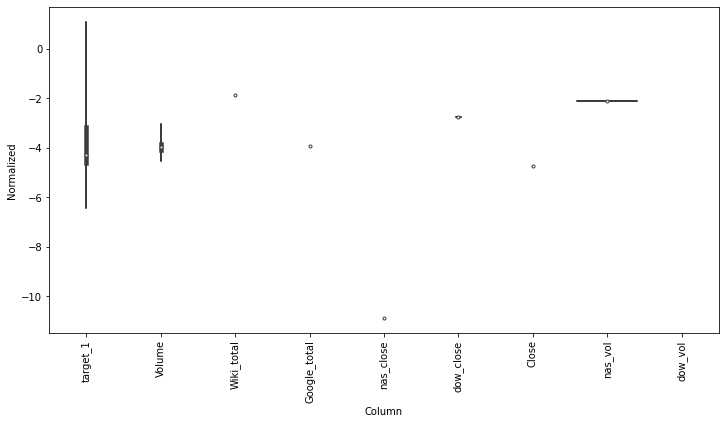

In [17]:
# Visual Distribution of the features, this did not work as well once I included normailzed only data, don't know why
ford_1_std = (Ford_1 - train_f1_mean) / train_f1_std
ford_1_std = ford_1_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=ford_1_std)
_ = ax.set_xticklabels(Ford_1.keys(), rotation=90)

In [18]:
# Tensor Flow times series dataframe modifier
#### for this function to work as written the target variable MUST be the first column in the Dataframe #####
      # this can be modified you just need to know which column target gets put in in the numpy matrix


# format
# X                                             y
# [[[V1_0, V2_0], [V1_1, V2_1], [V1_2, V2_2]]]  [target_3]
# [[[V1_1, V2_1], [V1_2, V2_3], [V1_3, V2_3]]]  [target_4]
# [[[V1_2, V2_2], [V1_3, V2_3], [V1_4, V2_4]]]  [target_5]

def df_to_X_y2(df, window_size=5):
  df_as_np = df.to_numpy() # converts to matrix of numpy arrays
  X = []
  y = []
  for i in range(len(df_as_np)-window_size): # length of data frame - window_size so it does't take empty values at the end
    row = [r for r in df_as_np[i:i+window_size]] # grabs row i and all rows above within the window size length
    X.append(row) # creates 3 dimentional array, (# obseravtions, # rows in window, # features)
    label = df_as_np[i+window_size][0] # pulls the target variable after the window, tagrget varible needs to be column zero in this 
    y.append(label) # returns (N,) martix of targets i+window_length time periods away
  return np.array(X), np.array(y)

In [19]:
Xf1_train, yf1_train = df_to_X_y2(train_f1)
Xf1_val, yf1_val = df_to_X_y2(val_f1)
Xf1_test, yf1_test = df_to_X_y2(test_f1)

In [20]:
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, InputLayer
from keras.utils.np_utils import to_categorical

In [31]:
# define model
n_steps = 5
n_features = 9

model = Sequential()
model.add(Conv1D(filters=2, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation='softmax')) # was getting lots of errors, apparently for binary classification needs just 1 in its shape???
# this was the explination I got after typing in error;  
# ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1))
# thought binary classification needed output of 2 though

model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 4, 2)              38        
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 2, 2)             0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 50)                250       
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 339
Trainable params: 339
Non-trainable params: 0
________________________________________________________

In [32]:
model.fit(Xf1_train,yf1_train,epochs=10,  validation_data=(Xf1_val, yf1_val))

Epoch 1/10
18/18 [==============================] - 1s 23ms/step - loss: 0.6825 - accuracy: 0.4174 - val_loss: 0.6792 - val_accuracy: 0.4091
Epoch 2/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6790 - accuracy: 0.4174 - val_loss: 0.6808 - val_accuracy: 0.4091
Epoch 3/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6779 - accuracy: 0.4174 - val_loss: 0.6844 - val_accuracy: 0.4091
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6765 - accuracy: 0.4174 - val_loss: 0.6833 - val_accuracy: 0.4091
Epoch 5/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.4174 - val_loss: 0.6806 - val_accuracy: 0.4091
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6751 - accuracy: 0.4174 - val_loss: 0.6820 - val_accuracy: 0.4091
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.4174 - val_loss: 0.6836 - val_accuracy: 0.4091
Epoch 8/10
18/18 [

In [33]:
hat = model.predict(Xf1_test)

In [34]:
hat 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [35]:
hat = (hat > 0.5)
metrics.accuracy_score(yf1_test,hat)

0.52

In [36]:
yf1_test, hat

(array([1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 1., 1.]),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ Tr

In [37]:
model2 = Sequential()
model2.add(InputLayer((5, 9)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(2))

model2.compile(optimizer='adam', loss='BinaryCrossentropy',
                   metrics=["accuracy"], )

model2.fit(Xf1_train, yf1_train, epochs=20,  validation_data=(Xf1_val, yf1_val))

Epoch 1/20
18/18 [==============================] - 1s 12ms/step - loss: 2.1448 - accuracy: 0.4646 - val_loss: 7.0442 - val_accuracy: 0.4091
Epoch 2/20
18/18 [==============================] - 0s 5ms/step - loss: 1.7991 - accuracy: 0.4973 - val_loss: 4.9511 - val_accuracy: 0.4221
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 1.2663 - accuracy: 0.5227 - val_loss: 1.7874 - val_accuracy: 0.4545
Epoch 4/20
18/18 [==============================] - 0s 4ms/step - loss: 1.0568 - accuracy: 0.5372 - val_loss: 1.2011 - val_accuracy: 0.6039
Epoch 5/20
18/18 [==============================] - 0s 5ms/step - loss: 1.0085 - accuracy: 0.5045 - val_loss: 1.1996 - val_accuracy: 0.5519
Epoch 6/20
18/18 [==============================] - 0s 6ms/step - loss: 1.5444 - accuracy: 0.5245 - val_loss: 2.8517 - val_accuracy: 0.4091
Epoch 7/20
18/18 [==============================] - 0s 5ms/step - loss: 1.6836 - accuracy: 0.5191 - val_loss: 2.3730 - val_accuracy: 0.4351
Epoch 8/20
18/18 [=

In [38]:
yf1_hat = model2.predict(Xf1_test)
#metrics.accuracy_score(yf1_test, yf1_hat)
yf1_hat

array([[ 0.38090017,  0.25122583],
       [ 0.9139482 ,  0.6362824 ],
       [ 0.11184497, -0.00551247],
       [ 0.22665195, -0.23130922],
       [ 0.15720509, -0.39631793],
       [ 0.27900946, -0.22819984],
       [ 0.03397487, -0.28559068],
       [ 0.22708605, -0.44348556],
       [ 0.25453928, -0.11878382],
       [ 0.48513952,  0.2319439 ],
       [ 0.3667068 ,  0.51618457],
       [ 0.66699344,  0.5345569 ],
       [ 0.62033296,  0.26944223],
       [ 0.6730507 ,  0.4681451 ],
       [ 0.82915914,  0.5929318 ],
       [ 0.9024698 ,  0.9453597 ],
       [ 1.2160367 ,  1.2838428 ],
       [ 0.25202796, -0.0819025 ],
       [ 0.38402277, -0.8121875 ],
       [ 0.05321532, -1.2633929 ],
       [ 0.34237382, -0.45505488],
       [ 0.3207265 , -0.40676862],
       [ 0.6018281 ,  0.03138862],
       [ 0.6381951 ,  0.05456395],
       [ 0.34203202,  0.07160933],
       [ 0.45966998, -0.07436352],
       [ 0.61482567, -0.4957779 ],
       [ 0.01929147, -0.76556486],
       [-0.01821954,

In [29]:
# define model
n_steps = 5
n_features = 9

model3 = Sequential()
model3.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model3.add(Conv1D(filters=16, kernel_size=2, activation='relu')) 
model3.add(MaxPooling1D(pool_size=2)) 
model3.add(Flatten())
model3.add(Dense(50, activation='relu')) 
model3.add(Dense(1, activation='sigmoid')) # was getting lots of errors, apparently for binary classification needs just 1 in its shape???
# this was the explination I got after typing in error;  
# ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1))
# thought binary classification needed output of 2 though

model3.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])
model3.fit(Xf1_train, yf1_train, epochs=20,  validation_data=(Xf1_val, yf1_val))
hat2 = model.predict(Xf1_test)
hat2 = (hat2 > 0.5)
metrics.accuracy_score(yf1_test,hat2)

Epoch 1/20
18/18 [==============================] - 1s 11ms/step - loss: 0.7114 - accuracy: 0.4374 - val_loss: 0.6844 - val_accuracy: 0.5909
Epoch 2/20
18/18 [==============================] - 0s 4ms/step - loss: 0.6834 - accuracy: 0.5808 - val_loss: 0.6876 - val_accuracy: 0.5909
Epoch 3/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5826 - val_loss: 0.6872 - val_accuracy: 0.5909
Epoch 4/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5844 - val_loss: 0.6874 - val_accuracy: 0.5909
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.5898 - val_loss: 0.6920 - val_accuracy: 0.5909
Epoch 6/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.5862 - val_loss: 0.6964 - val_accuracy: 0.5909
Epoch 7/20
18/18 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.5935 - val_loss: 0.6867 - val_accuracy: 0.5909
Epoch 8/20
18/18 [=

0.52

In [30]:
hat2

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [